In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [21]:
from utils import plot_wigner

### Constants

In [3]:
N = 5
k1 = 1
k2 = 20
omega = 1

### States

In [4]:
psi = fock(N, 0)
psi2 = fock(N, N - 1)

psi3 = (psi + psi2).unit()

In [5]:
rho2 = fock_dm(N,1).unit()
rho2

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

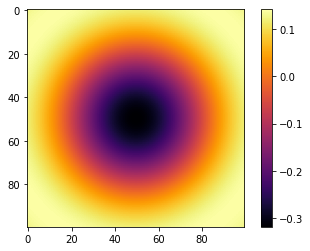

In [25]:
plot_wigner(rho2, np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), cmap='inferno')

### QHO Operators

In [8]:
a = create(N)
adag = destroy(N)

### Operators for Dynamics
Natural units so set $\hbar = 1$

In [9]:
H = omega * adag * a

gain = k1 * lindblad_dissipator(adag)
loss = k2 * lindblad_dissipator(a**2)

### Simulation

In [10]:
times = np.linspace(0.0, 10.0, 10)
result = mesolve(H, psi, times, [gain, loss])

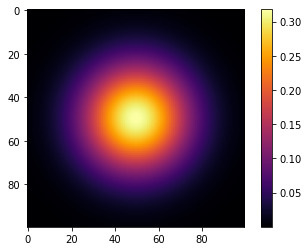

In [26]:
plot_wigner(result.states[0], np.linspace(-2, 2, 100), np.linspace(-2, 2, 100), cmap='inferno')

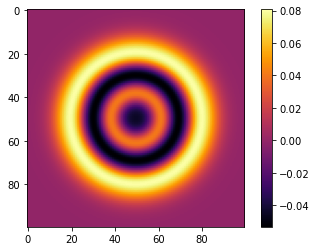

In [27]:
plot_wigner(result.states[-1], np.linspace(-4, 4, 100), np.linspace(-4, 4, 100), cmap='inferno')

### Steady State